# Distances statistics

## 0. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
from scipy import stats
import pingouin
import sys

## 1. Import data

### 1.1 Load separate distances

In [3]:
file_path = 'C:/Users/alibe/Desktop/Project/training_files/XXX/08_XXX_distances_ZZZ.csv'

BS_8 = pd.read_csv(file_path.replace('XXX', 'Bsubtilis').replace('ZZZ', '8'), usecols = ['Distance'])
BS_3 = pd.read_csv(file_path.replace('XXX', 'Bsubtilis').replace('ZZZ', '3'), usecols = ['Distance'])
DV_8 = pd.read_csv(file_path.replace('XXX', 'Dvulgaris').replace('ZZZ', '8'), usecols = ['Distance'])
DV_3 = pd.read_csv(file_path.replace('XXX', 'Dvulgaris').replace('ZZZ', '3'), usecols = ['Distance'])
LL_8 = pd.read_csv(file_path.replace('XXX', 'Llactis').replace('ZZZ', '8'), usecols = ['Distance'])
LL_3 = pd.read_csv(file_path.replace('XXX', 'Llactis').replace('ZZZ', '3'), usecols = ['Distance'])
PF_8 = pd.read_csv(file_path.replace('XXX', 'Pfluorescens').replace('ZZZ', '8'), usecols = ['Distance'])
PF_3 = pd.read_csv(file_path.replace('XXX', 'Pfluorescens').replace('ZZZ', '3'), usecols = ['Distance'])
PP_8 = pd.read_csv(file_path.replace('XXX', 'Pputida').replace('ZZZ', '8'), usecols = ['Distance'])
PP_3 = pd.read_csv(file_path.replace('XXX', 'Pputida').replace('ZZZ', '3'), usecols = ['Distance'])
SE_8 = pd.read_csv(file_path.replace('XXX', 'Senterica').replace('ZZZ', '8'), usecols = ['Distance'])
SE_3 = pd.read_csv(file_path.replace('XXX', 'Senterica').replace('ZZZ', '3'), usecols = ['Distance'])
SR_8 = pd.read_csv(file_path.replace('XXX', 'Srubiginosus').replace('ZZZ', '8'), usecols = ['Distance'])
SR_3 = pd.read_csv(file_path.replace('XXX', 'Srubiginosus').replace('ZZZ', '3'), usecols = ['Distance'])
TT_8 = pd.read_csv(file_path.replace('XXX', 'Tthermophilus').replace('ZZZ', '8'), usecols = ['Distance'])
TT_3 = pd.read_csv(file_path.replace('XXX', 'Tthermophilus').replace('ZZZ', '3'), usecols = ['Distance'])

In [4]:
BS_8['Species'] = 'B. subtilis'
BS_3['Species'] = 'B. subtilis'
DV_8['Species'] = 'D. vulgaris'
DV_3['Species'] = 'D. vulgaris'
LL_8['Species'] = 'L. lactis'
LL_3['Species'] = 'L. lactis'
PF_8['Species'] = 'P. fluorescens'
PF_3['Species'] = 'P. fluorescens'
PP_8['Species'] = 'P. putida'
PP_3['Species'] = 'P. putida'
SE_8['Species'] = 'S. enterica'
SE_3['Species'] = 'S. enterica'
SR_8['Species'] = 'S. rubiginosus'
SR_3['Species'] = 'S. rubiginosus'
TT_8['Species'] = 'T. thermophilus'
TT_3['Species'] = 'T. thermophilus'

### 1.2 Merge to one file

In [5]:
distances_8 = BS_8.append([DV_8, LL_8, PF_8, PP_8, SE_8, SR_8, TT_8])

In [6]:
distances_3 = BS_3.append([DV_3, LL_3, PF_3, PP_3, SE_3, SR_3, TT_3])

In [7]:
distances = pd.DataFrame({'Species':distances_8['Species'],
                          '8-state':distances_8['Distance'],
                          '3-state':distances_3['Distance']})

In [8]:
path = 'C:/Users/alibe/Desktop/Project/matrices/distances_BS'
distances.to_csv(path + '.csv')

## 2. Boxplots

(0, 0.45)

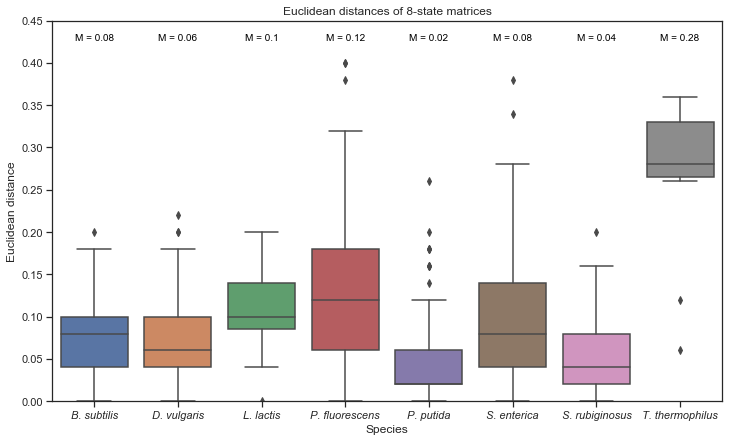

In [9]:
fig1, ax1 = plt.subplots(figsize = (12, 7))
fig1 = sns.boxplot(x = 'Species', y = '8-state', data = distances)

fig1.set_ylabel('Euclidean distance')
fig1.set_title('Euclidean distances of 8-state matrices')
fig1.set_xticklabels(list(distances['Species'].unique()), style = 'italic')

for cat in fig1.get_xticks():
    y = round(fig1.get_lines()[4+cat*6].get_ydata()[0],3) 

    ax1.text(
        cat, 
        0.43, 
        f'M = {y}', 
        ha='center', 
        va='center', 
        size=10,
        color='black')

plt.ylim([0,0.45])

In [10]:
ax1.get_figure().savefig(path.replace('distances_BS', 'Box_8-state') + '.png')

(0, 0.38)

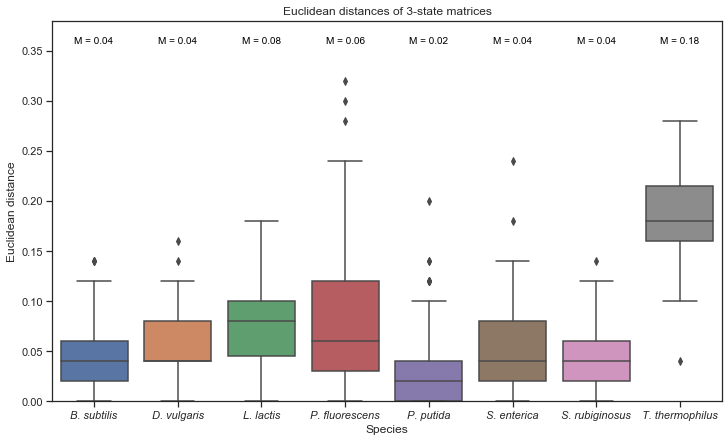

In [11]:
fig2, ax2 = plt.subplots(figsize = (12, 7))
fig2 = sns.boxplot(x = 'Species', y = '3-state', data = distances)

fig2.set_ylabel('Euclidean distance')
fig2.set_title('Euclidean distances of 3-state matrices')
fig2.set_xticklabels(list(distances['Species'].unique()), style = 'italic')

for cat in fig2.get_xticks():
    y = round(fig2.get_lines()[4+cat*6].get_ydata()[0],3) 

    ax2.text(
        cat, 
        0.36, 
        f'M = {y}', 
        ha='center', 
        va='center', 
        size=10,
        color='black')

plt.ylim([0,0.38])

In [12]:
ax2.get_figure().savefig(path.replace('distances_BS', 'Box_3-state') + '.png')

## 3. Stats

In [9]:
BS_8_test = BS_8.Distance
DV_8_test = DV_8.Distance
LL_8_test = LL_8.Distance
PF_8_test = PF_8.Distance
PP_8_test = PP_8.Distance
SE_8_test = SE_8.Distance
SR_8_test = SR_8.Distance
TT_8_test = TT_8.Distance

In [10]:
BS_3_test = BS_3.Distance
DV_3_test = DV_3.Distance
LL_3_test = LL_3.Distance
PF_3_test = PF_3.Distance
PP_3_test = PP_3.Distance
SE_3_test = SE_3.Distance
SR_3_test = SR_3.Distance
TT_3_test = TT_3.Distance

In [11]:
distances_8_test = [BS_8_test, DV_8_test, LL_8_test, PF_8_test, PP_8_test, SE_8_test, SR_8_test, TT_8_test]
distances_8_names = ['BS_8', 'DV_8', 'LL_8', 'PF_8', 'PP_8', 'SE_8', 'SR_8', 'TT_8']

In [12]:
distances_3_test = [BS_3_test, DV_3_test, LL_3_test, PF_3_test, PP_3_test, SE_3_test, SR_3_test, TT_3_test]
distances_3_names = ['BS_3', 'DV_3', 'LL_3', 'PF_3', 'PP_3', 'SE_3', 'SR_3', 'TT_3']

### 3.1 ANOVA

In [13]:
stats.kruskal(BS_8_test, DV_8_test, LL_8_test, PF_8_test, PP_8_test, SE_8_test, SR_8_test, TT_8_test)

KruskalResult(statistic=282.541219724098, pvalue=3.222595370256851e-57)

In [14]:
stats.kruskal(BS_3_test, DV_3_test, LL_3_test, PF_3_test, PP_3_test, SE_3_test, SR_3_test, TT_3_test)

KruskalResult(statistic=146.13427502617893, pvalue=2.6301597949915147e-28)

### 3.2 Follow-up

In [31]:
stats_8 = pingouin.pairwise_ttests(dv = 'Distance', between = 'Species', parametric = False,
                                   return_desc = True, alpha = 0.05, padjust = 'bonf',
                                   effsize = 'glass', data = distances_8)

In [32]:
stats_3 = pingouin.pairwise_ttests(dv = 'Distance', between = 'Species', parametric = False,
                                   return_desc = True, alpha = 0.05, padjust = 'bonf',
                                   effsize = 'glass', data = distances_3)

In [33]:
stats_8_sig = stats_8[stats_8['p-corr'] < 0.05]

In [34]:
stats_3_sig = stats_3[stats_3['p-corr'] < 0.05]

In [35]:
stats_8_filt = stats_8_sig.drop(['Contrast', 'Paired', 'Parametric', 'Tail', 'p-unc', 'p-adjust'], axis=1)

In [36]:
stats_3_filt = stats_3_sig.drop(['Contrast', 'Paired', 'Parametric', 'Tail', 'p-unc', 'p-adjust'], axis=1)

In [37]:
stats_8_filt.to_csv(path.replace('distances_BS', 'stats_8-state') + '.csv')
stats_3_filt.to_csv(path.replace('distances_BS', 'stats_3-state') + '.csv')